## Tratamento prévio

Algumas questões que podem se fazer:

- Tem valores perdidos no meio do conjunto de dados?
- Há valores atípicos no conjunto?
- Como são as variáveis no conjunto? São quantidades contínuas ou categóricas?
- Como é feita a distribuição das variáveis contínuas? Podem ser descritas como uma distribuição normal (bell-shaped curves)?
- Quas são as unidades das variáveis?  Serão misturadas nos algoritmos de machine learning?

## Dados para Análisis de brinquedos

As funções usadas contém o seguinte prefixo `make_ *`. Essa informação é artificial

In [1]:
import sklearn.datasets as d
import numpy as np

In [2]:
d.make_*?

d.make_biclusters
d.make_blobs
d.make_checkerboard
d.make_circles
d.make_classification
d.make_friedman1
d.make_friedman2
d.make_friedman3
d.make_gaussian_quantiles
d.make_hastie_10_2
d.make_low_rank_matrix
d.make_moons
d.make_multilabel_classification
d.make_regression
d.make_s_curve
d.make_sparse_coded_signal
d.make_sparse_spd_matrix
d.make_sparse_uncorrelated
d.make_spd_matrix
d.make_swiss_roll

## Como criar um conjunto de dados

1. criar uma regressão

In [3]:
reg_data = d.make_regression()

In [4]:
len(reg_data)

2

In [5]:
reg_data[0].shape

(100, 100)

In [6]:
reg_data[1].shape

(100,)

Por padrão, gerou uma tupla com duas matrizes, uma matriz de 100x100, e uma segunda matriz coluna de 100, que é a variável target

2. Por exemplo, para criar uma matriz de 1000x10, com 5 elementos responsáveis, e 2 targets, e um factor de polarização de 1.

In [7]:
complex_data_reg = d.make_regression(1000,10,n_informative=5, n_targets=2, bias=1.0 )

In [8]:
complex_data_reg[0].shape

(1000, 10)

## Criar um conjunto de classificação desbalanceado

In [9]:
classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([10, 90])

In [10]:
classification_set[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Criar um conjunto para agrupamento

In [11]:
blobs_data, blobs_target = d.make_blobs()

In [12]:
blobs_data.shape

(100, 2)

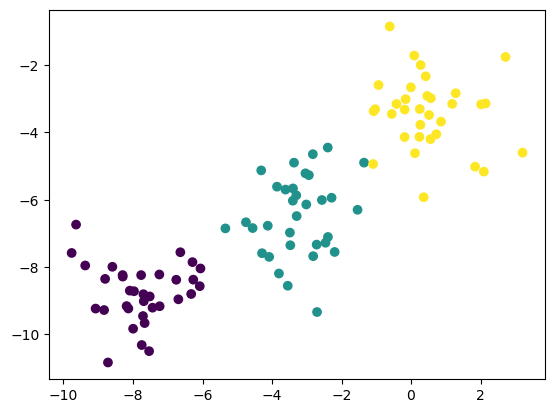

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(blobs_data[:,0], blobs_data[:,1], c=blobs_target)
plt.show()

## Como funciona

Primeiro , uma matriz aleatória é gerada com o tamanho específico.

```python
X = np.random.randn(n_exemplos, n_caracteristica)

# criado o conjunto básico, o conjunto alvo é criado

veracidade = np.zeros((np_exemplo, n_alvo))
veracidade[:n_info, :] = 100 * np.random.randn(n_info, n_alvos)
```

Multiplicar matrizes, `X` e `veracidade` para obter os valores do "alvo", vieses, se for adicionados.
```python

y = np.dot(X, veracidade) + bias
```

Então o conjunto de dados será `n_exemplos`, que é o número de linhas do conjunto, e `n_alvo` que é a variável alvo.

O "Bias" pode ser um escalar e finalmente é adicionado ruído e baralhar o conjunto de dados.

## Escalar dados para  distribuição padrão normal

É recomendado escalar colunas para o padrão normal. É preciso algo de estatísticas nesse momento.

Aprender a escalar dados é importante, porque muitos algoritmos tem desempenhos diferentes (errados) quando hà dados em diferentes escalas.

O módulo `preprocessing` contém varias funções úteis.

In [14]:
from sklearn import preprocessing

In [15]:
# importando load_boston from datasets, mas este foi removido, então foi abaixado dessa url
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep='\s+',skiprows=22, header=None)
X = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
y = raw_df.values[1::2,2]

In [16]:
X[:,:3].mean(axis=0)

array([ 3.61352356, 11.36363636, 11.13677866])

In [17]:
X[:,:3].std(axis=0)

array([ 8.59304135, 23.29939569,  6.85357058])

Muito para aprender deste, primeiro que a primeira caracteristica tem a média mais baixa, mas varia no desvio padrão mais do que a terceira.E segundo, a segunda caracterisitica tem o valor mais alto da média e do desvio padrão.

In [18]:
X_2 = preprocessing.scale(X[:,:3])
X_2.mean(axis=0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16])

In [19]:
X_2.std(axis=0)

array([1., 1., 1.])

## Como funciona

A função de escalar dados é bem simples, esta substrai a média e divide pelo desvio padrão.

Assim, da para ver como era o antes e o depois com pandas.

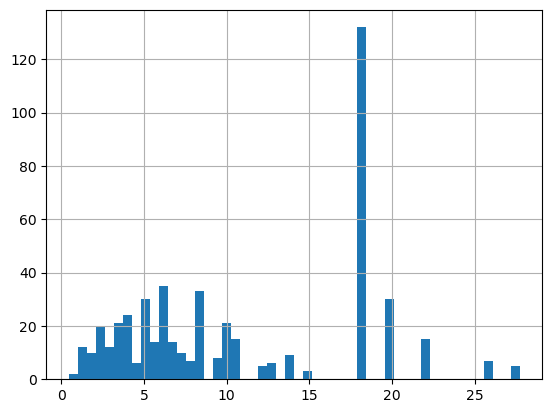

In [20]:
# antes
pd.Series(X[:,2]).hist(bins=50)
plt.show()

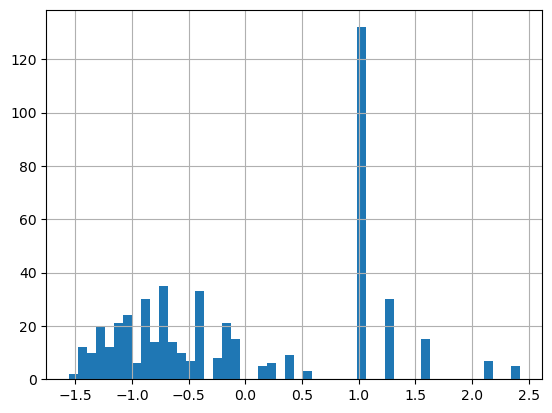

In [21]:
# depois
pd.Series(preprocessing.scale(X[:,2])).hist(bins=50)
plt.show()

Há uma classe para escalar dados, e esta é bem útil quando é usada com **pipelines**

In [22]:
m_escaladora = preprocessing.StandardScaler()
m_escaladora.fit(X[:, :3])

StandardScaler()

In [23]:
m_escaladora.transform(X[:, :3]).mean(axis=0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16])

Preprocessing também tem uma classe `MinMaxScaler`, que escala os dados dentro de um intervalo, e não somente entre 0 e 1 como no `StandardScaler`

In [24]:
m_minmax_scala = preprocessing.MinMaxScaler()

In [25]:
m_minmax_scala.fit(X[:, :3])
m_minmax_scala.transform(X[:, :3]).max(axis=0)

array([1., 1., 1.])

In [26]:
m_minmax_scala.transform(X[:, :3]).min(axis=0)

array([0., 0., 0.])

In [27]:
# para mudar o valor padrão 0-1
m_odd_scala = preprocessing.MinMaxScaler(feature_range=(-3.14, 3.14))

Normalization é uma opção muito interessante, que serve para 'escalar' (balancear), o tamanho de um no outro. E é usado da seguinte forma

```python
normalizar_X = preprocessing.normalize(X[:,:3])
```

In [28]:
normalizar_x =  preprocessing.normalize(X[:, :3])

In [29]:
(normalizar_x * normalizar_x).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Criar caracteristicas binárias atravéz de limites

Nos anteriores examplos, transformamos problemas de classificação em problemas de regressão. Pondo limítes, podemos transformar problemas de regressão em problemas de classificação. O que acontece muito na ciência de dados

In [30]:
# importando load_boston from datasets, mas este foi removido, então foi abaixado dessa url
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep='\s+',skiprows=22, header=None)
X = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
y = raw_df.values[1::2,2]

In [37]:
y = y.reshape(-1,1)

Para isso será utilizado caracteristicas do scikit-learn

- preprocessing.binarize
- preprocessing.Binarizer

1. Propor um valor limite para a média, se o valor é maior que a média, produz 1, caso contrário produz 0

In [40]:
from sklearn import preprocessing
new_target = preprocessing.binarize(y, threshold=(raw_df.values[1::2,2].mean()))
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

2. Parece fácil, bora checar se está funcionando 

In [42]:
(y[:5] > y.mean()).astype(int)

array([[1],
       [0],
       [1],
       [1],
       [1]])

3. Utilizando o `Binarizer`

In [49]:
binar = preprocessing.Binarizer(threshold=y.mean())
new_target = binar.fit_transform(y)
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

## Matriz esparsa e método Fit
### Matriz esparsa

Matrizes esparsas, são as que não admite zeros, é com o propósito de poupar memória. Uma condição especial é que para a binarizar para matriz esparsa o limite não pode ser menor do que zero

In [54]:
from scipy.sparse import coo_matrix

In [55]:
spar = coo_matrix(np.random.binomial(1, .25, 100))
#preprocessing.binarize(spar, threshold=-1)

### Método Fit

O método fit existe para a transformação binária, mas este não ajusta nada, simplemente retorna o objeto. Mas o objeto contém os limites prontos para o método de transformação.

## Usando variáveis categoricas

In [56]:
from sklearn import datasets

iris = datasets.load_iris()

In [57]:
X = iris.data
y = iris.target

1. colocar `x` e `y` , todo os dados numéricos, criar um encoder com scikit-learn para manipular as categorias da coluna y

In [58]:
from sklearn import preprocessing
cat_encoder = preprocessing.OneHotEncoder()
cat_encoder.fit_transform(y.reshape(-1,1)).toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Como funciona

O codificador cria funcionalidades adicionais para cada variável categorica, e o valor retornado é uma matriz esparsa. Cada linha na nova funcionalidade tem 0, exceto para a coluna que tem um valor associado com a categoria da funcionalidade. Dessa forma, faz sentido salvar os dados em uma matriz esparsa. Então o `cat_encoder` é um modelo padrão do scikit-learn

In [59]:
cat_encoder.transform(np.ones((3,1))).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Scikit-learn tem a capacidade para esse tipo de regressão com múltiplas saídas. Bora ver uma

In [60]:
from sklearn.linear_model import Ridge
ridge_inst = Ridge()

Agora é preciso importar regressor de múltiplas saídas que pegue a instancia do regressor ridge como um argumento

In [61]:
from sklearn.multioutput import MultiOutputRegressor
multi_ridge = MultiOutputRegressor(ridge_inst, n_jobs=-1)

In [62]:
y_multi = cat_encoder.fit_transform(y.reshape(-1,1)).toarray()

In [64]:
#criar conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, stratify=y, random_state=7)

In [65]:
# ajustar o estimador
multi_ridge.fit(X_train, y_train)

MultiOutputRegressor(estimator=Ridge(), n_jobs=-1)

In [67]:
MultiOutputRegressor(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                                     random_state=None, solver='auto', tol=0.001),
                    n_jobs=-1)

MultiOutputRegressor(estimator=Ridge(tol=0.001), n_jobs=-1)

In [68]:
# prever o alvo multi-saida com o conjunto de teste
y_multi_pre = multi_ridge.predict(X_test)
y_multi_pre[:5]

array([[ 0.81327059,  0.37348962, -0.1867602 ],
       [ 0.9524035 ,  0.17877376, -0.13117727],
       [-0.01657826,  0.36538441,  0.65119386],
       [ 0.1772412 ,  0.47768186,  0.34507695],
       [ 0.87693053,  0.14905609, -0.02598662]])

In [69]:
# usar a função de binarizar para virar numeros reais em inteiros
y_multi_pre = preprocessing.binarize(y_multi_pre, threshold=0.5)
y_multi_pre[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])